# Malaria in Africa

### 1. Cleaning the dataset

In [26]:
# Ssemwogerere Trevor Simon 21/U/12345/PS

#import libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import folium 
from fancyimpute import IterativeImputer
from sklearn.preprocessing import MinMaxScaler
import numpy as np


In [27]:
# Load the data percentage of missing values and number of blanks
df = pd.read_csv("MalariaAfricaDataset.csv")

total_rows = df.shape[0]
missing_percentages = df.isnull().sum() / total_rows * 100
number_of_blanks = df.isnull().sum()

print("Percentage of missing values:")
print(missing_percentages)

print("\nNumber of blanks:")
print(number_of_blanks)


Percentage of missing values:
Country Name                                                                                0.000000
Year                                                                                        0.000000
Country Code                                                                                0.000000
Incidence of malaria (per 1,000 population at risk)                                         7.407407
Malaria cases reported                                                                      7.407407
Use of insecticide-treated bed nets (% of under-5 population)                              77.777778
Children with fever receiving antimalarial drugs (% of children under age 5 with fever)    79.461279
Intermittent preventive treatment (IPT) of malaria in pregnancy (% of pregnant women)      82.154882
People using safely managed drinking water services (% of population)                      83.333333
People using safely managed drinking water services, rural (%

c:\Users\Blessing\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\impute\_iterative.py:796: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(



Normalized DataFrame:


,Incidence of malaria,Malaria cases reported,insecticide-treated bed nets,Children with fever receiving antimalarial drugs,IPT,drinking water services,drinking water services rural,drinking water services urban,managed sanitation services,sanitation services rural,...,Rural population,Rural population growth,Urban population,urban population growth,basic drinking water services,basic drinking water services rural,basic drinking water services urban,basic sanitation services,basic sanitation services rural,basic sanitation services urban
0,0.257181,0.314625,0.460139,0.125561,0.130626,0.504190,0.691103,0.397377,0.195796,0.257073,...,0.298660,0.270398,0.701340,0.610788,0.884501,0.830877,0.892716,0.851068,0.648694,0.909823
1,0.620909,0.377105,0.179894,0.498011,0.025168,0.387612,0.348099,0.332750,0.303195,0.175205,...,0.397624,0.508539,0.602376,0.801660,0.267945,0.081179,0.288458,0.339648,0.104673,0.488334
2,0.866414,0.314624,0.412996,0.730678,0.316283,0.224012,0.087434,0.347019,0.341216,0.344055,...,0.599343,0.516129,0.400657,0.725311,0.491045,0.457478,0.505740,0.071677,0.020744,0.114092
3,0.258475,0.314640,0.285913,0.166698,0.190906,0.811954,0.691595,0.678859,0.380676,0.239155,...,0.392442,0.190702,0.607558,0.784232,0.704132,0.489853,0.883740,0.595832,0.329317,0.755016
4,0.896302,0.316427,0.363303,0.677533,0.232870,0.172261,0.139209,0.315405,0.282623,0.216509,...,0.833923,0.532258,0.166077,0.876349,0.328727,0.339212,0.503861,0.111672,0.038809,0.395590
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
589,0.610100,0.386155,0.726984,0.511866,0.699664,0.343201,0.113573,0.512146,0.316964,0.288618,...,0.604398,0.477230,0.395602,0.700415,0.510083,0.378594,0.773325,0.117251,0.047626,0.187004
590,0.177941,0.019156,0.181025,0.025846,0.084790,1.000000,0.316281,1.000000,1.000000,1.000000,...,0.257078,0.346300,0.742922,0.516183,0.948949,0.865668,0.995408,0.904431,0.686812,0.964886
591,0.684391,0.790029,0.707984,0.799068,0.430617,0.115030,0.085068,0.276055,0.325954,0.301782,...,0.831395,0.612903,0.168605,0.904564,0.284022,0.292341,0.482154,0.141880,0.123429,0.157839
592,0.460212,0.538951,0.512294,0.524498,0.325952,0.457913,0.315440,0.456332,0.298576,0.279951,...,0.581395,0.518027,0.418605,0.735270,0.437174,0.300797,0.664788,0.225029,0.147285,0.276015


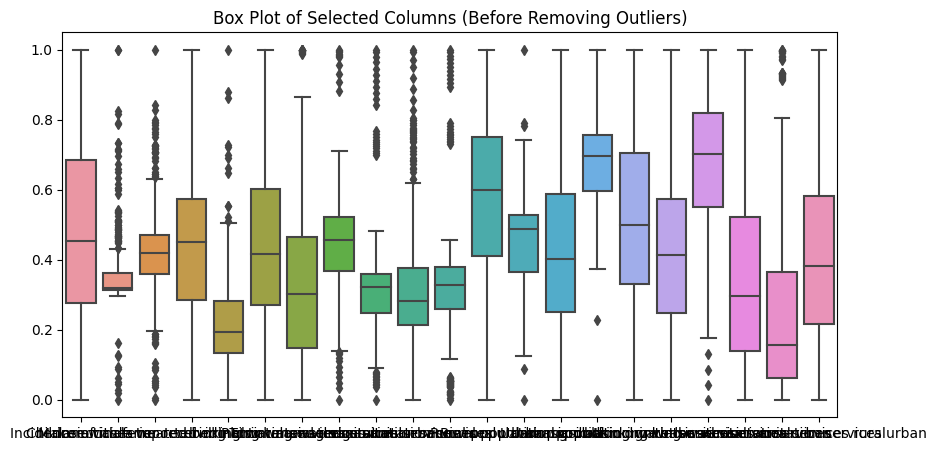

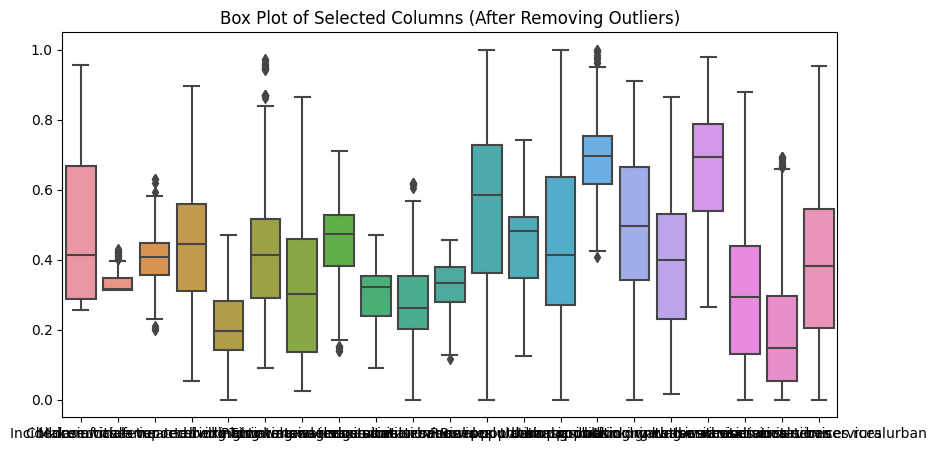

In [28]:
df = pd.read_csv("MalariaAfricaDataset.csv")
# Extract columns of interest with high percentages of missing data
columns_of_interest = ["Use of insecticide-treated bed nets (% of under-5 population)",
                       "Children with fever receiving antimalarial drugs (% of children under age 5 with fever)",
                       "Intermittent preventive treatment (IPT) of malaria in pregnancy (% of pregnant women)",
                       "People using safely managed drinking water services (% of population)",
                       "People using safely managed drinking water services, rural (% of rural population)",
                       "People using safely managed drinking water services, urban (% of urban population)",
                       "People using safely managed sanitation services (% of population)",
                       "People using safely managed sanitation services, rural (% of rural population)",
                       "People using safely managed sanitation services, urban  (% of urban population)"]

# Prepare the data for multiple imputation (exclude non-numeric columns)
numeric_values = df.drop(["Country Name", "Year", "Country Code", "geometry"], axis=1)

# Perform multiple imputation using IterativeImputer
imputer = IterativeImputer()
imputed_values = imputer.fit_transform(numeric_values)

# Convert the imputed array back to a DataFrame
df_imputed = pd.DataFrame(imputed_values, columns=numeric_values.columns)

# Merge the imputed numeric values with the non-numeric columns
non_numeric = df[["Country Name", "Year", "Country Code", "geometry", "latitude", "longitude"]]
df_combined = pd.concat([non_numeric, df_imputed], axis=1)


# Normalize the selected columns using Min-Max scaling
scaler = MinMaxScaler()
normalized_data = scaler.fit_transform(df_combined.drop(["Country Name", "Year", "Country Code", "geometry", "latitude", "longitude"], axis=1))

# Convert the normalized_data array back to a DataFrame with column names
normalized_df = pd.DataFrame(normalized_data, columns=["Incidence of malaria","Malaria cases reported","insecticide-treated bed nets","Children with fever receiving antimalarial drugs","IPT","drinking water services","drinking water services rural","drinking water services urban","managed sanitation services","sanitation services rural","sanitation services urban","Rural population","Rural population growth","Urban population","urban population growth","basic drinking water services","basic drinking water services rural","basic drinking water services urban","basic sanitation services","basic sanitation services rural","basic sanitation services urban"])

# Display the normalized DataFrame
print("\nNormalized DataFrame:")
display(normalized_df)

# Create a box plot to identify outliers using IQR method
plt.figure(figsize=(10, 5))
sns.boxplot(data=normalized_df)
plt.title('Box Plot of Selected Columns (Before Removing Outliers)')
plt.show()

# Remove outliers using IQR (Interquartile Range) method
Q1 = normalized_df.quantile(0.25)
Q3 = normalized_df.quantile(0.75)
IQR = Q3 - Q1
outliers_removed = normalized_df[~((normalized_df < (Q1 - 1.5 * IQR)) | (normalized_df > (Q3 + 1.5 * IQR))).any(axis=1)]
df = pd.concat([non_numeric, normalized_df], axis=1)

# Create a box plot after removing outliers
plt.figure(figsize=(10, 5))
sns.boxplot(data=outliers_removed)
plt.title('Box Plot of Selected Columns (After Removing Outliers)')
plt.show()


### Study the countries with the highest number of malaria cases per annum.

In [ ]:
# Group the data by country and calculate the average incidence of malaria cases
average_incidence_by_country = df.groupby("Year")
for name, group in average_incidence_by_country:
    # Visualize the top countries with the highest average incidence and their corresponding number of malaria cases
    plt.figure(figsize=(12, 6))
    plt.bar(group["Country Name"], group["Malaria cases reported"], color='blue', label='Malaria Cases reported')
    plt.xlabel('Country Name')
    plt.ylabel('Malaria Cases reported')
    plt.title(f'Malaria Cases in countries in {name}')
    plt.legend()
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()


In [ ]:
# Group the data by country and calculate the average incidence of malaria cases
average_incidence_by_country = df.groupby("Country Name")
for name, group in average_incidence_by_country:
    # Visualize the top countries with the highest average incidence and their corresponding number of malaria cases
    plt.figure(figsize=(12, 6))
    plt.plot(group["Year"].values, group["Malaria cases reported"].values, color='blue', label='Malaria Cases reported')
    plt.xlabel('Years')
    plt.ylabel('Malaria cases reported')
    plt.title(f'Malaria Cases reported in {name}')
    plt.legend()
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()

In [ ]:
# Get the latitude and longitude for each country
country_coordinates = df
country_coordinates = country_coordinates.drop_duplicates("Country Name")

# Create the map
map_center = [country_coordinates["latitude"].mean(), country_coordinates["longitude"].mean()]
malaria_map = folium.Map(location=map_center, zoom_start=3)

# Add markers for each country
for index, row in country_coordinates.iterrows():
    country_name = row["Country Name"]
    latitude = row["latitude"]
    longitude = row["longitude"]

    popup_text = f"{country_name}<br>Average Incidence:"
    folium.Marker(location=[latitude, longitude], popup=popup_text).add_to(malaria_map)

# Display the map
malaria_map

### How using safely managed drinking water affects the number of malaria cases reported per Year.

In [7]:
# Group the data by country and calculate the average incidence of malaria cases
average_incidence_by_country = df.groupby("Year")

for name, group in average_incidence_by_country:
    fig, ax = plt.subplots(1,1, figsize=(15,15))
    x = np.arange(len(group["Country Name"].values))
    w =0.4
    ax.bar(x-w, group["Malaria cases reported"], width=w, color='b', label='Malaria cases reported', align='center')
    ax.bar(x, group["drinking water services"], width=w, color='r', label='Drinking water services',align='center')
    ax.set_xticks(np.arange(len(group["Country Name"].values)))
    ax.set_xticklabels(list(group["Country Name"].values))
    plt.xticks(rotation='vertical')
    plt.legend()
    plt.title(f"A bar chart showing malaria reported cases and drinking water services in the {name}.")
    plt.show()
 


# Heat map to show the correlation between 

In [8]:
# Group the data by country and calculate the average incidence of malaria cases
fig, ax = plt.subplots(1,1, figsize=(15,15))
ax.scatter(df["drinking water services"].values,df["Malaria cases reported"].values, color='b', label='Malaria cases reported')
plt.legend()
plt.title(f"A line graph showing malaria reported cases and drinking water services")
plt.xlabel("drinking water services")
plt.ylabel("Malaria cases reported")
plt.show()

<Axes: >

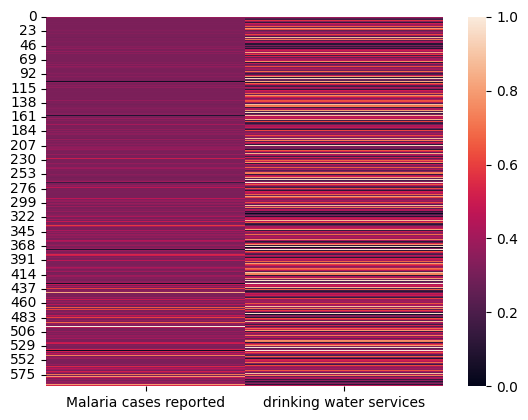

In [9]:
# Heat map describing the correlation
sns.heatmap(df[["Malaria cases reported", "drinking water services"]])

In [10]:
df[["Malaria cases reported", "drinking water services"]].corr()

,Malaria cases reported,drinking water services
Malaria cases reported,1.000000,-0.355198
drinking water services,-0.355198,1.000000


### Conclusion
There is no correlation between ther drinking water services and the cases of malaria reported in the country.

# Effect of population growth and use of insect treated bed nets on the number of reported cases of malaria.

In [59]:
# get total population
df["Total Population"] = df["Urban population"] + df["Rural population"]




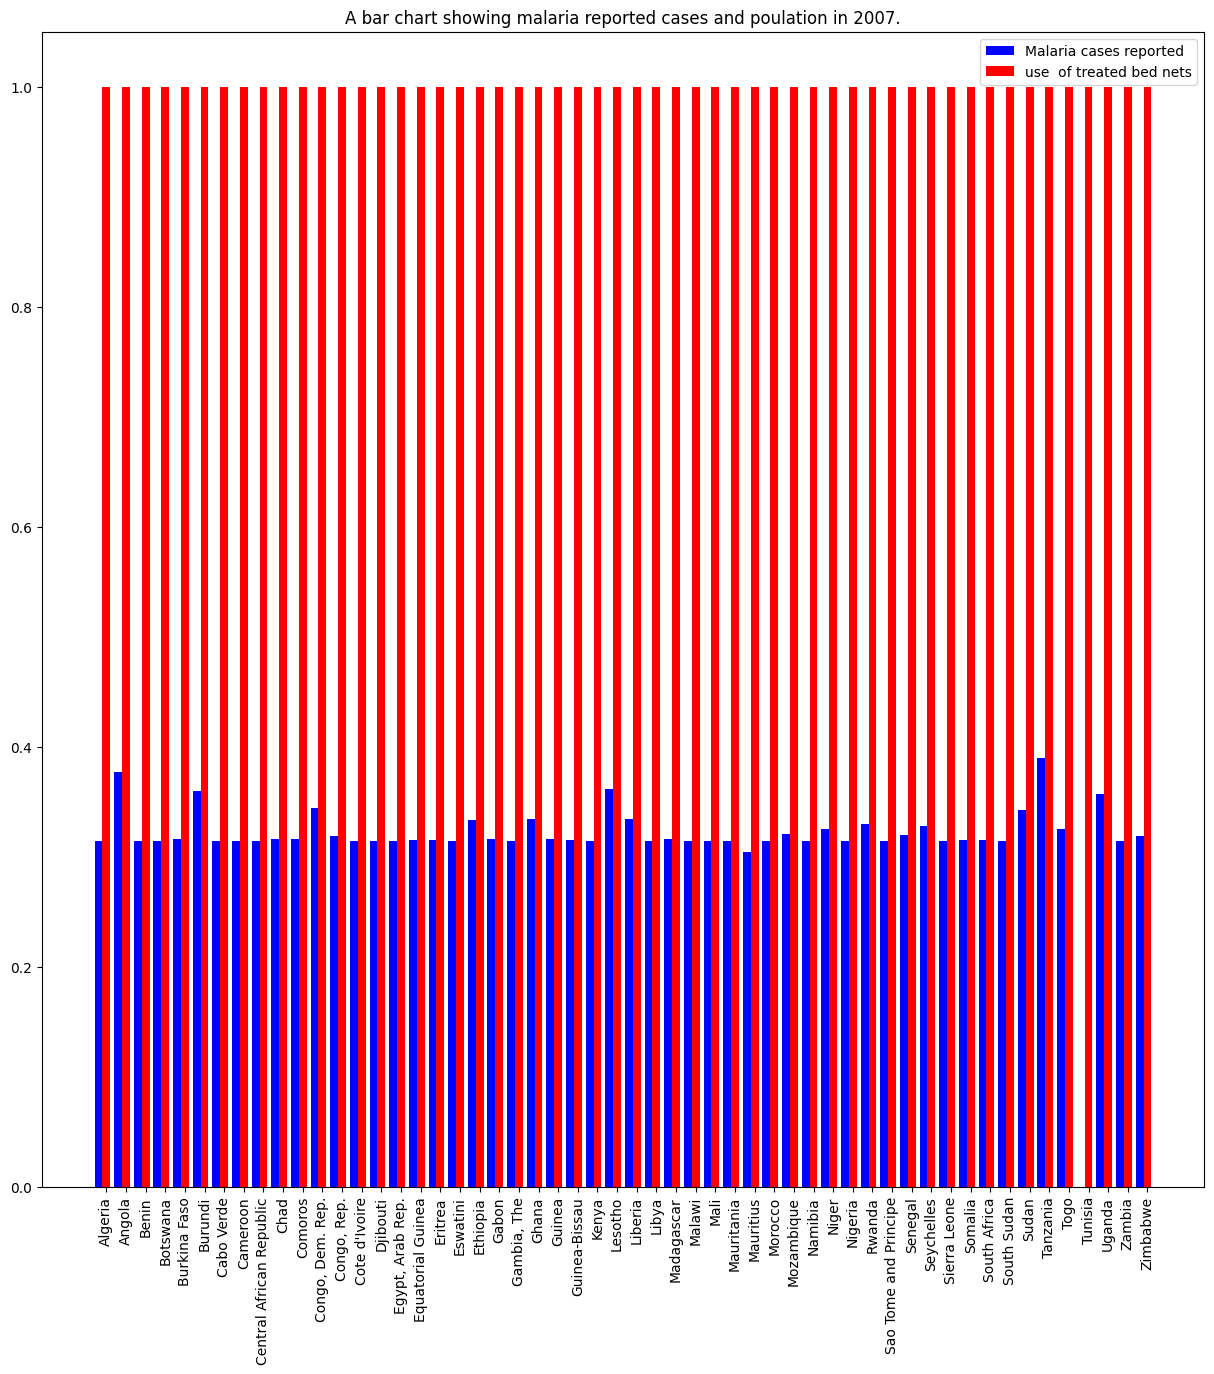

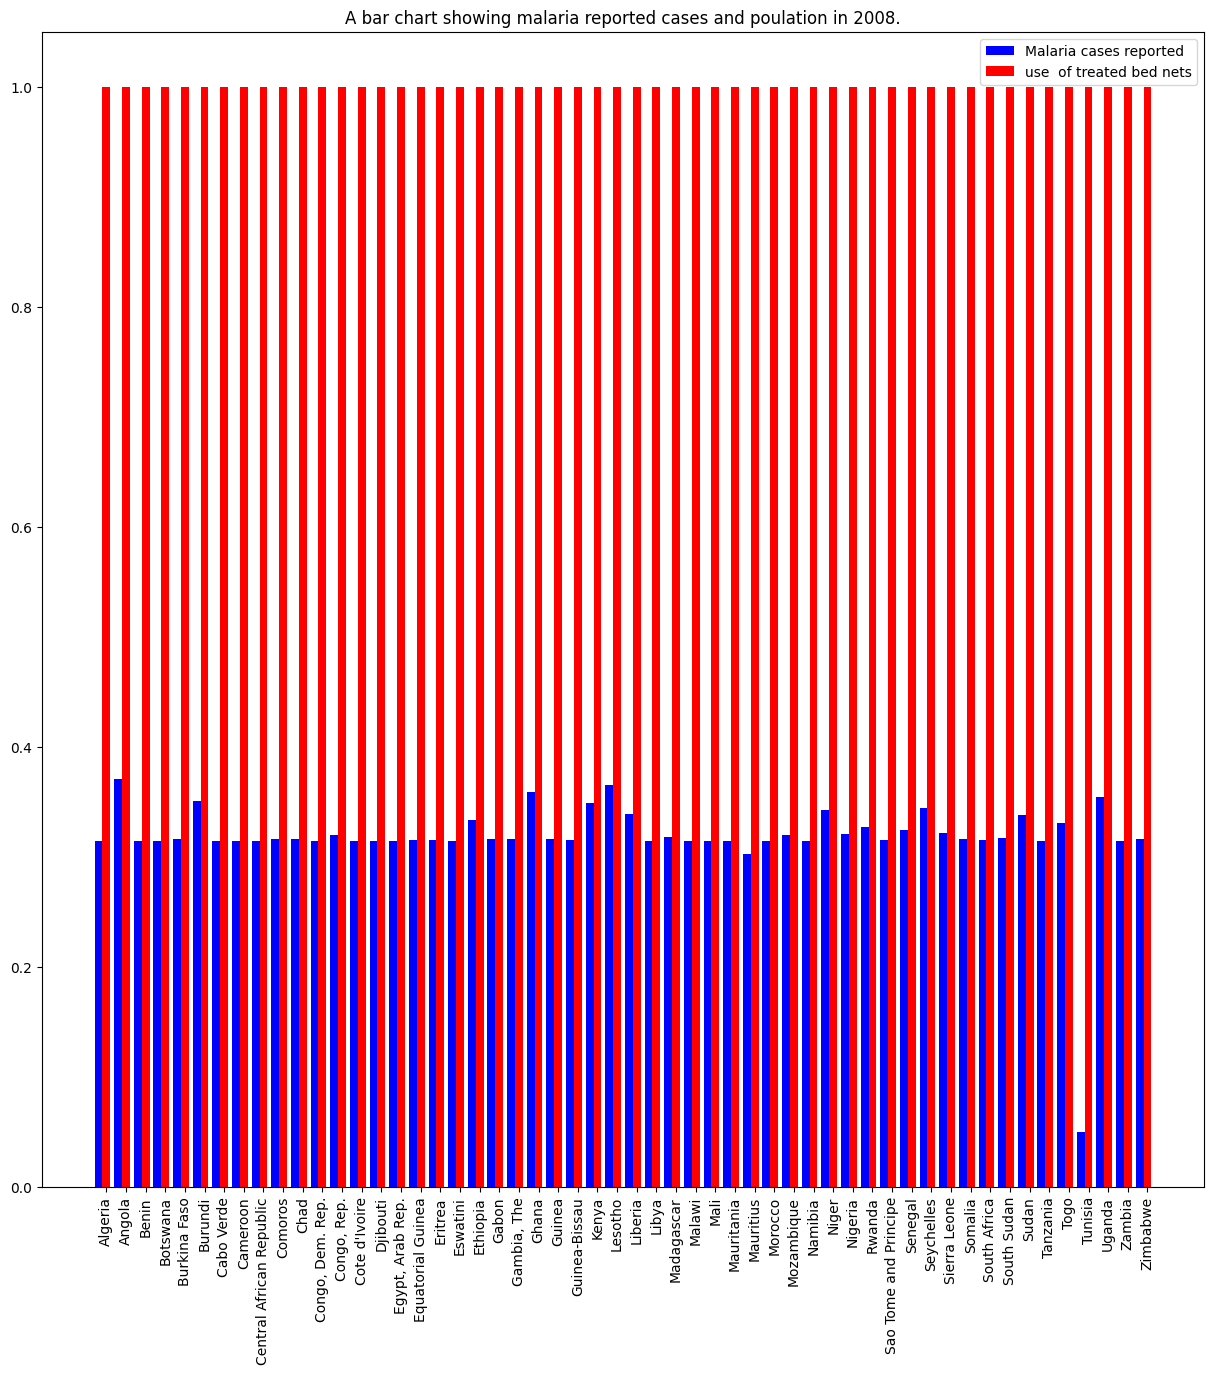

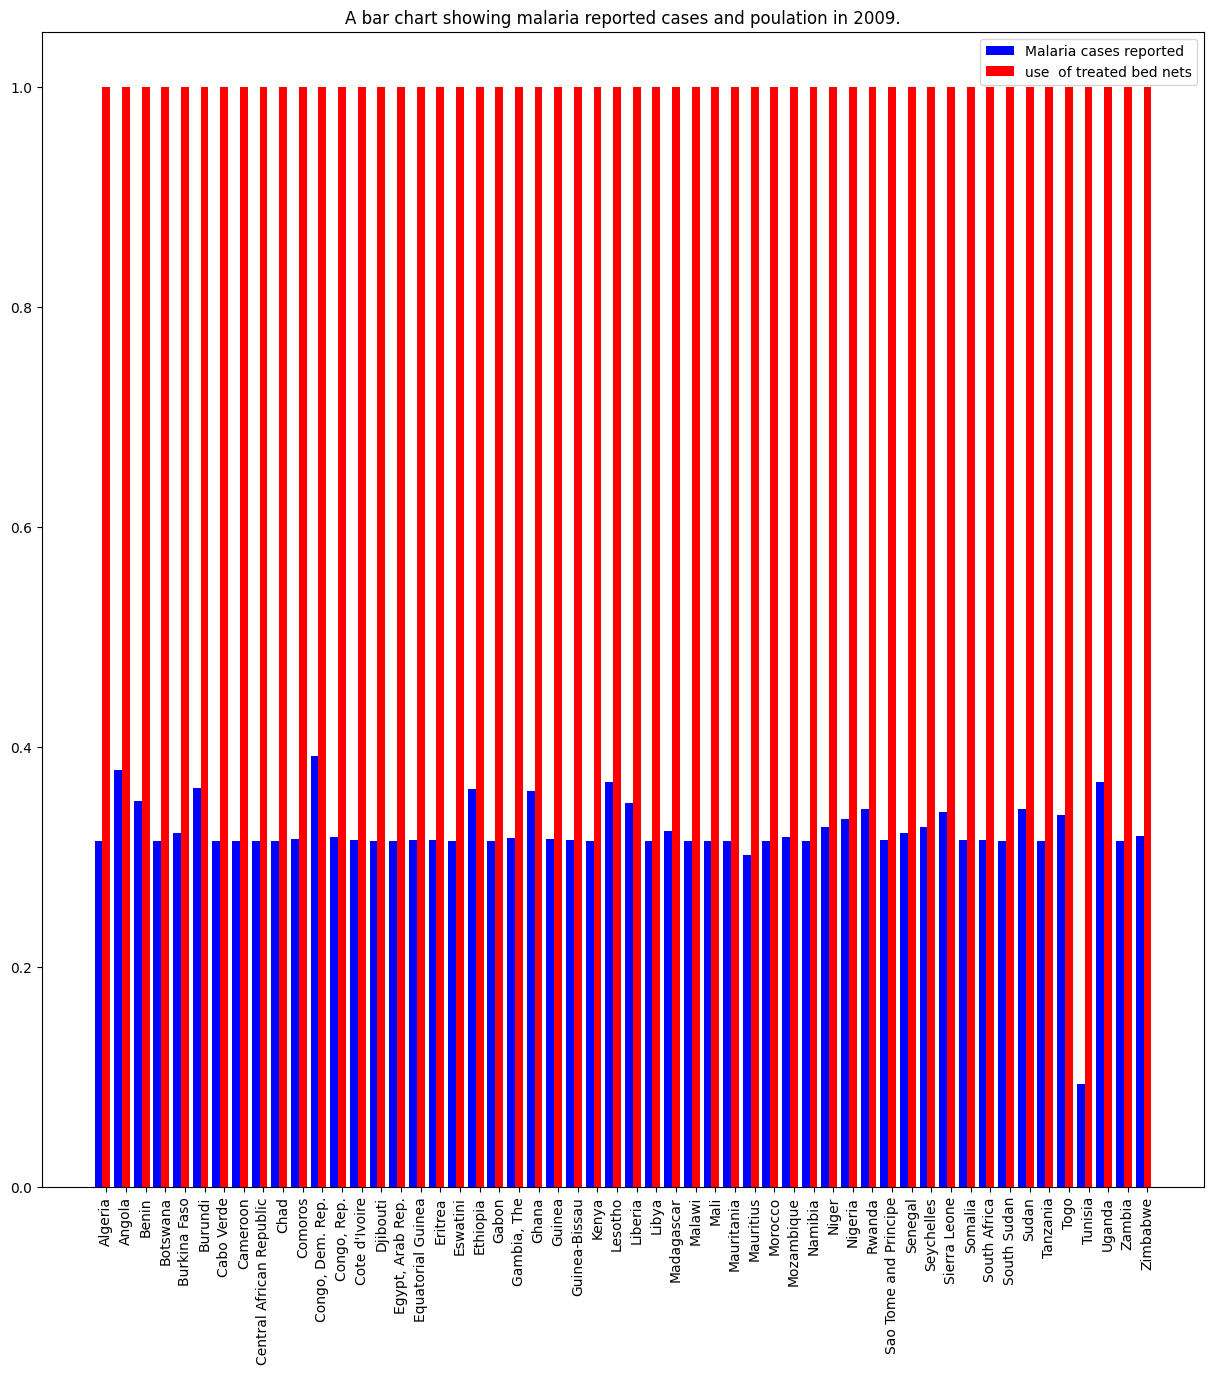

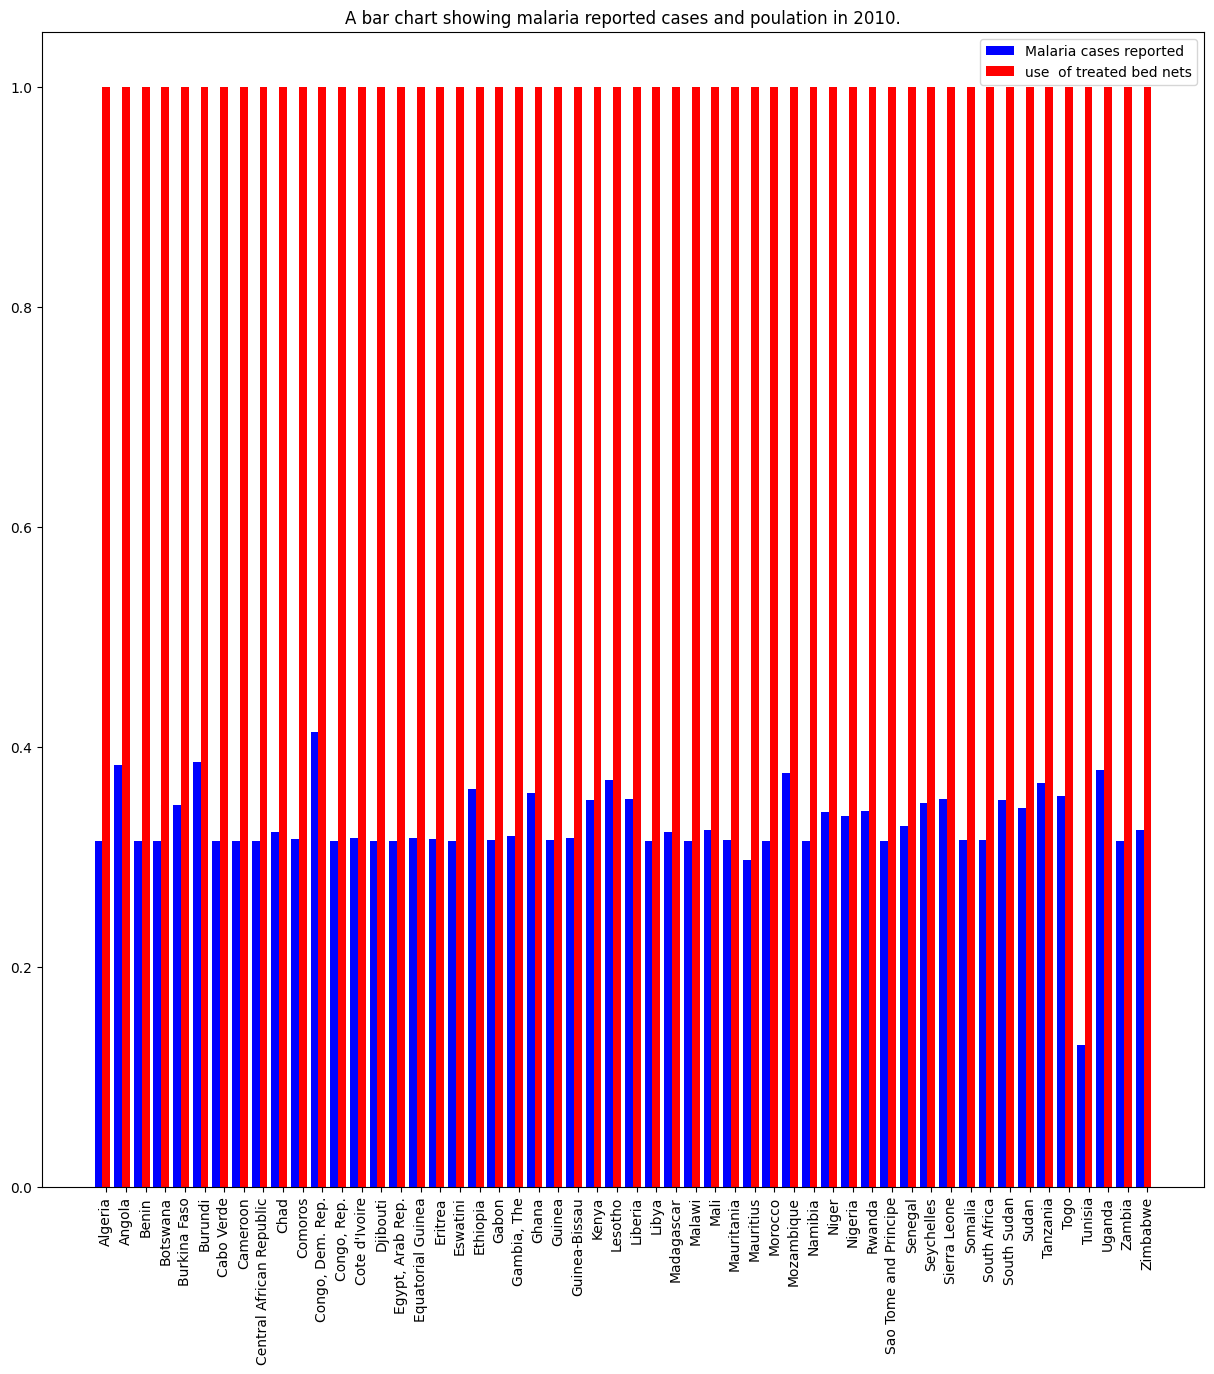

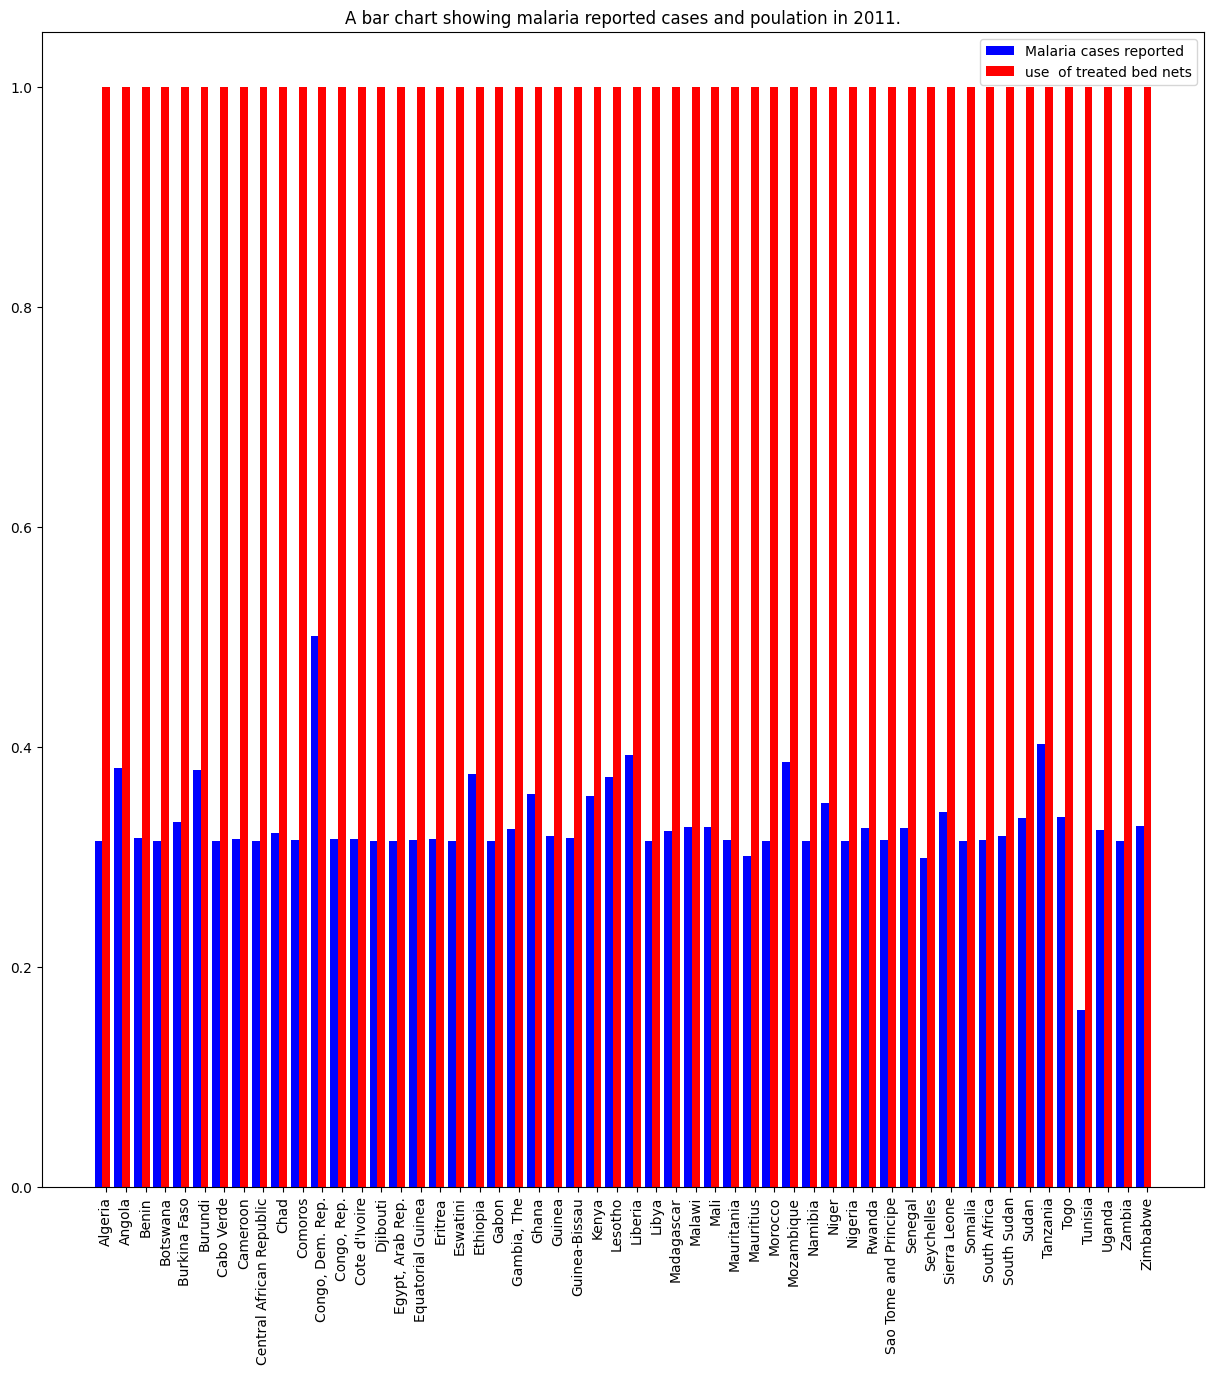

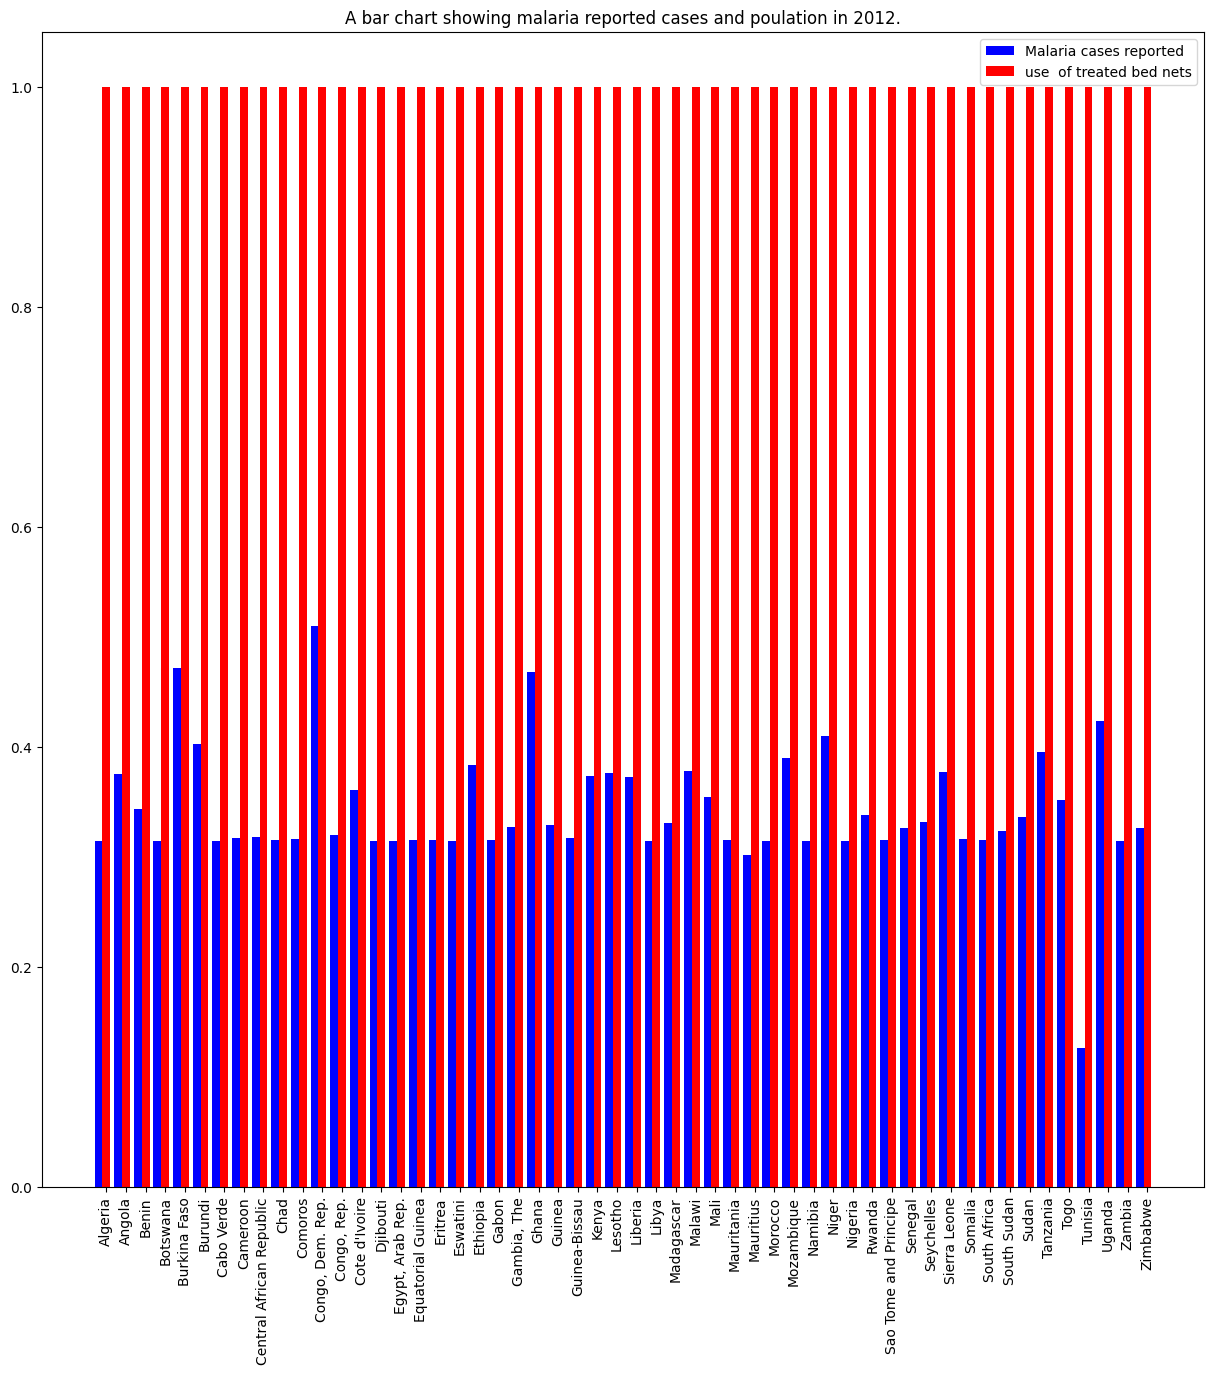

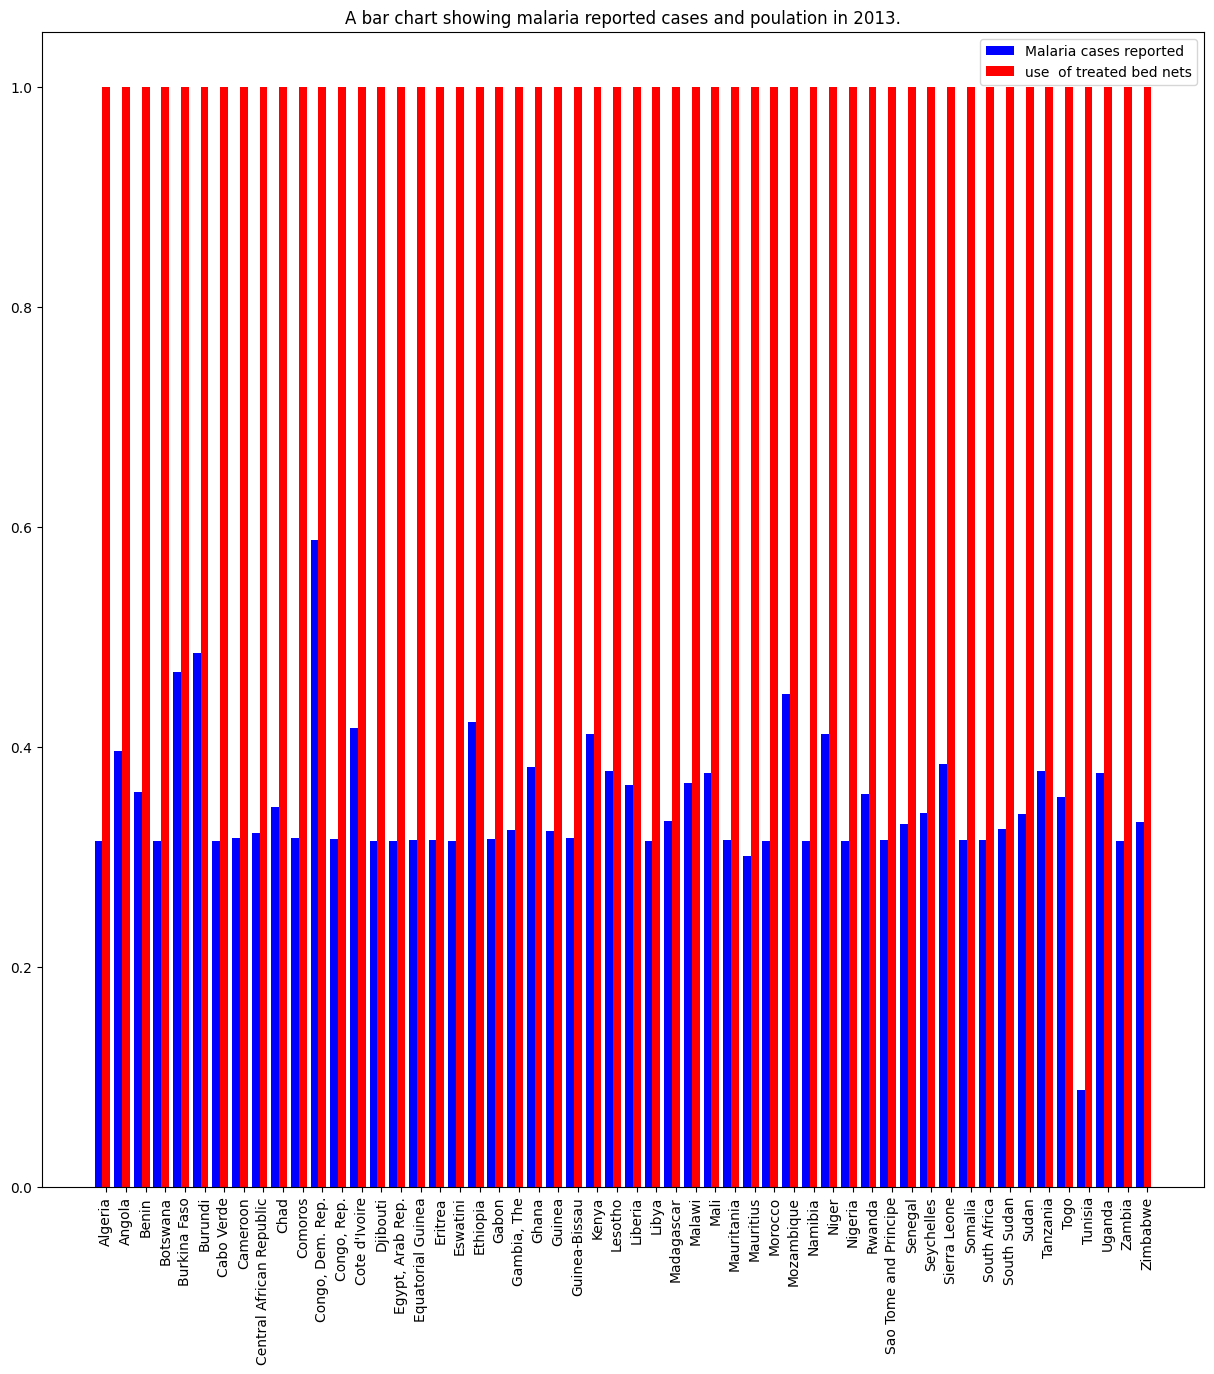

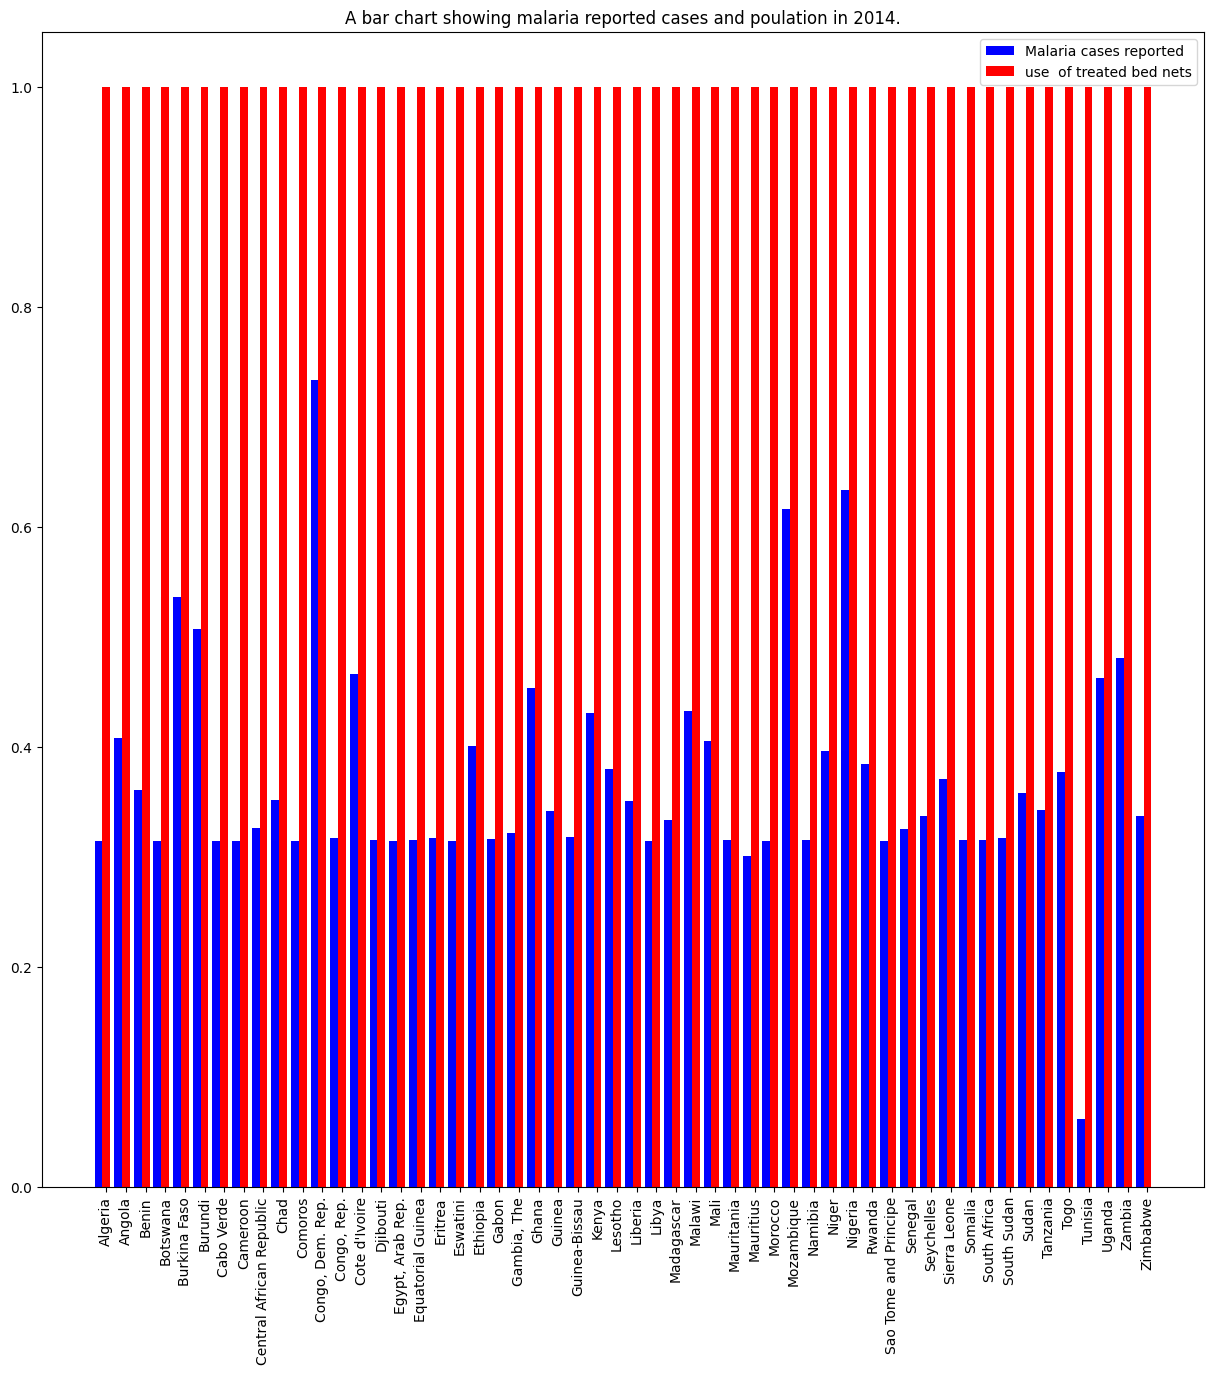

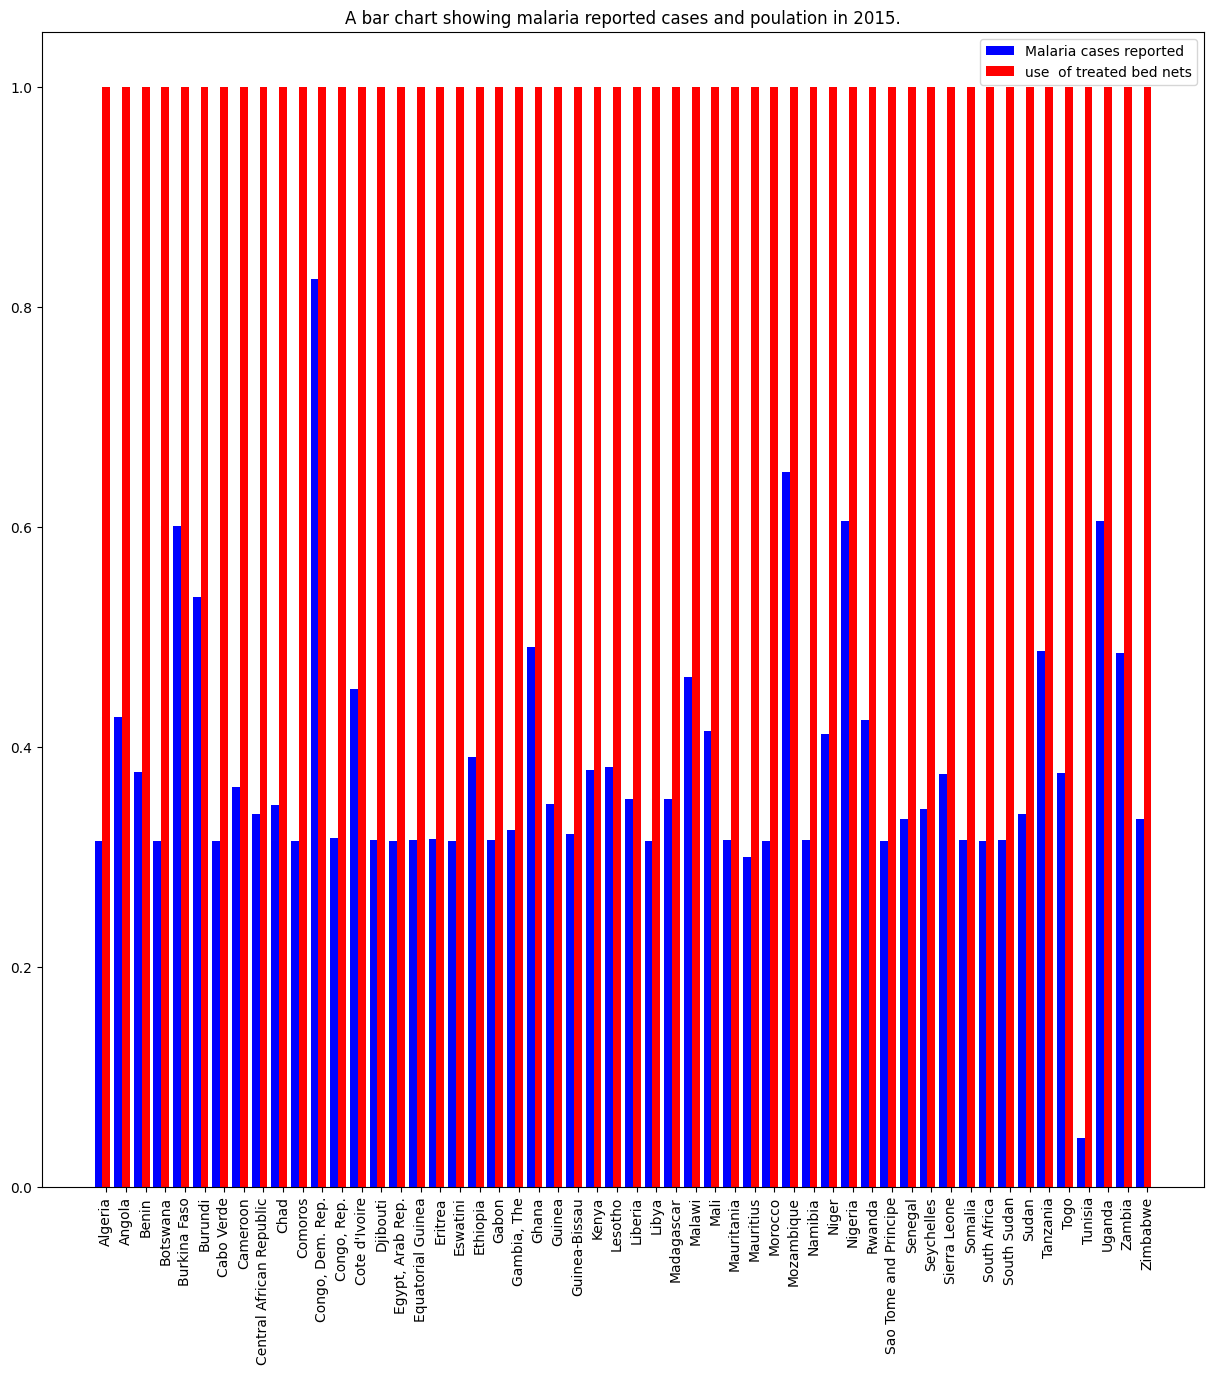

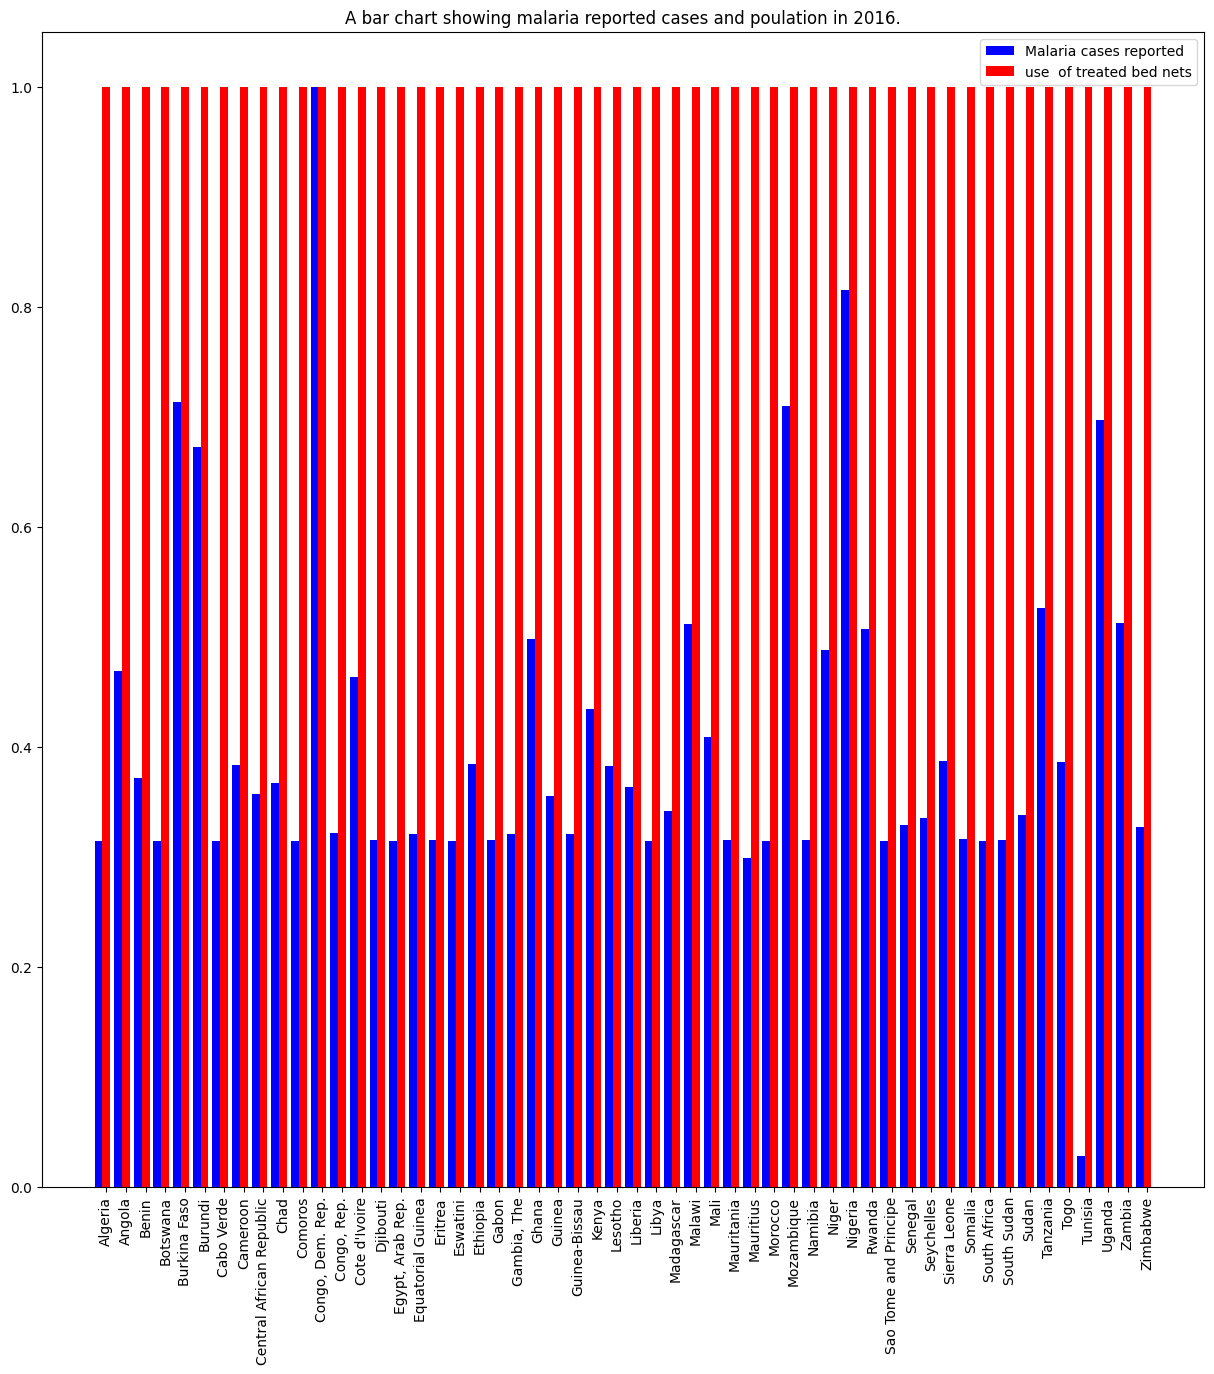

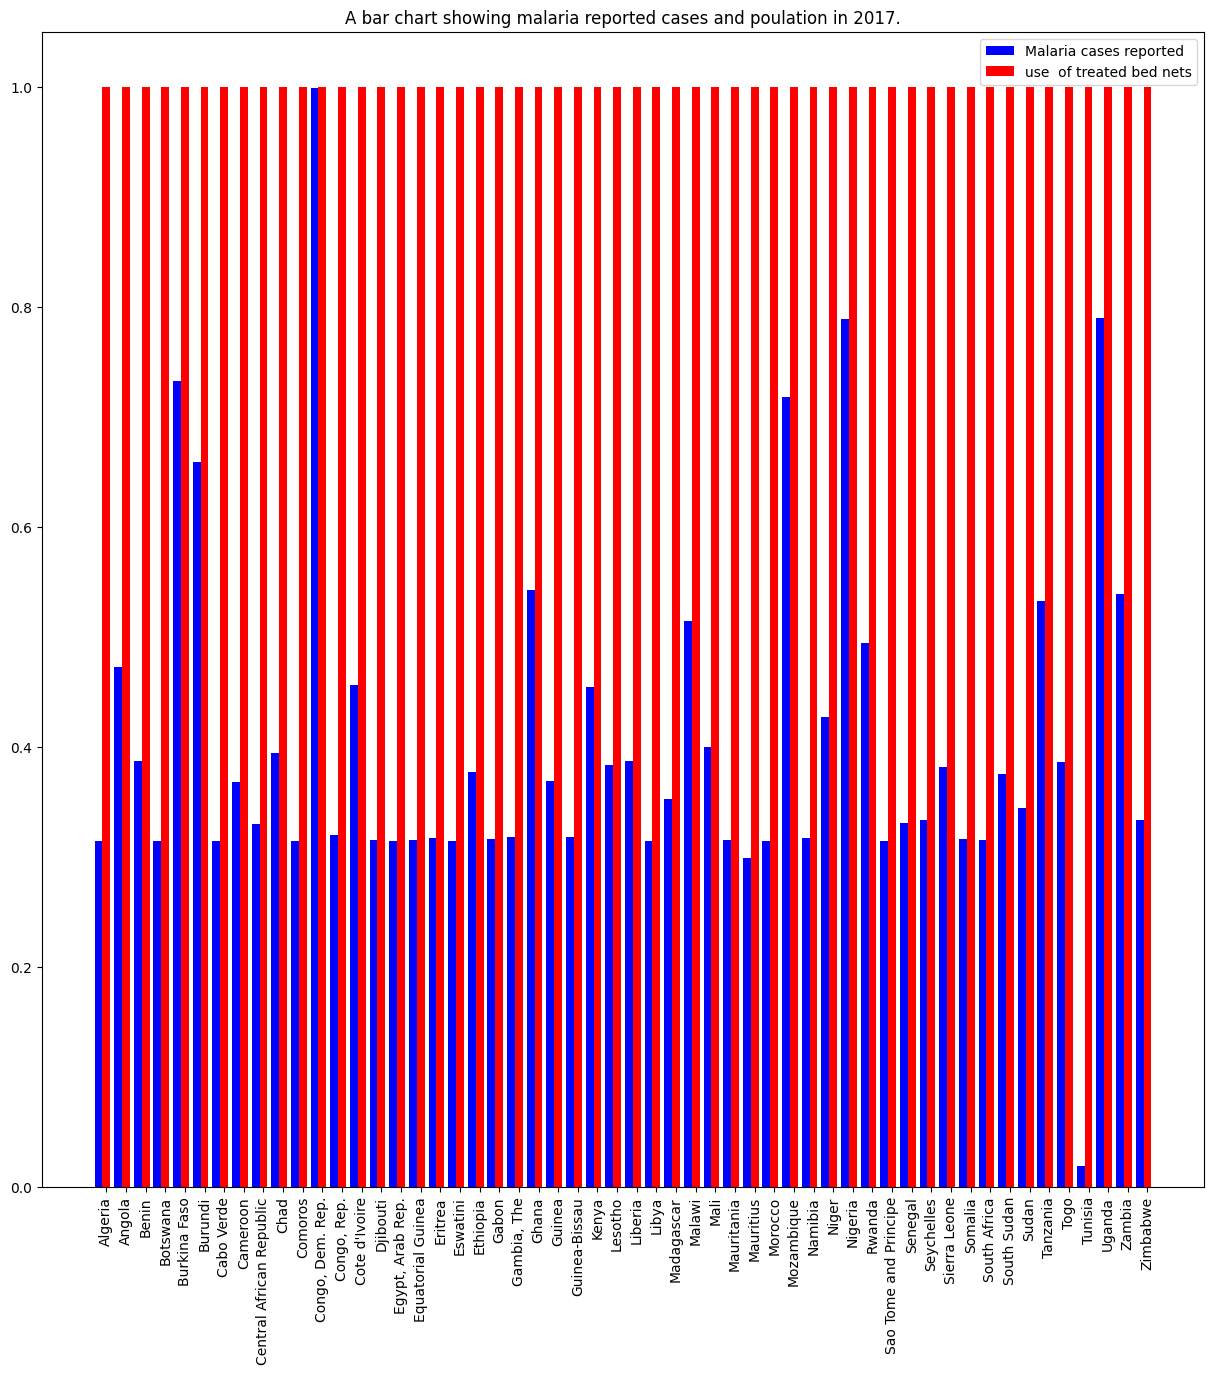

In [60]:
# NAGABA BLESSING 21/U/05218/PS 
# trends per year 
# Group the data by year and observe the effect
average_incidence_by_country = df.groupby("Year")

for name, group in average_incidence_by_country:
    fig, ax = plt.subplots(1,1, figsize=(15,15))
    x = np.arange(len(group["Country Name"].values))
    w =0.4
    ax.bar(x-w, group["Malaria cases reported"], width=w, color='b', label='Malaria cases reported', align='center')
    ax.bar(x, group["Total Population"], width=w, color='r', label='use  of treated bed nets',align='center')
    ax.set_xticks(np.arange(len(group["Country Name"].values)))
    ax.set_xticklabels(list(group["Country Name"].values))
    plt.xticks(rotation='vertical')
    plt.legend()
    plt.title(f"A bar chart showing malaria reported cases and poulation in {name}.")
    plt.show()

In [ ]:
# NAGABA BLESSING 21/U/05218/PS 
# trends per Year 
# using a bar plot

average_incidence_by_country = df.groupby("Year")

for name, group in average_incidence_by_country:
    fig, ax = plt.subplots(1,1, figsize=(15,15))
    x = np.arange(len(group["Country Name"].values))
    w =0.4
    ax.bar(x-w, group["Malaria cases reported"], width=w, color='b', label='Malaria cases reported', align='center')
    ax.bar(x, group["insecticide-treated bed nets"], width=w, color='r', label='use  of treated bed nets',align='center')
    ax.set_xticks(np.arange(len(group["Country Name"].values)))
    ax.set_xticklabels(list(group["Country Name"].values))
    plt.xticks(rotation='vertical')
    plt.legend()
    plt.title(f"A bar chart showing malaria reported cases and use of trated bed nets in {name}.")
    plt.show()
 

In [54]:
# get the correlation 
correlation = df['insecticide-treated bed nets'].corr(df['Malaria cases reported'])
print(f"Correlation coefficient: {correlation}")


Correlation coefficient: 0.47145775429418774


In [ ]:
# using a line plot
cases_by_year = df.groupby("Year")
for name, group in average_incidence_by_country:
    # Visualize the top countries with the highest average incidence and their corresponding number of malaria cases
    plt.figure(figsize=(12, 6))
    plt.scatter(group["insecticide-treated bed nets"], group["Malaria cases reported"], color='blue', label='Malaria Cases reported')
    plt.xlabel('use of treated bed nets')
    plt.ylabel('Malaria cases reported')
    plt.title(f'Malaria Cases in {name}')
    plt.legend()
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()
